<a href="https://colab.research.google.com/github/earroyoh/Kaggle/blob/master/Google-Landmark-Recognition-Challenge-2019/google-landmark-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

os.mkdir('/tmp/google-landmark')
os.mkdir('/tmp/google-landmark/train')

from shutil import copyfile,rmtree

#rmtree('/tmp/google-landmark/test')
os.mkdir('/tmp/google-landmark/test')

In [2]:
# Download training images
# I just download a few ones to create the model and not oversize colab environment
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_000.tar \
    -O /tmp/google-landmark/train/images_000.tar
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_100.tar \
    -O /tmp/google-landmark/train/images_100.tar
#!wget --no-check-certificate \
#     https://s3.amazonaws.com/google-landmark/train/images_200.tar \
#    -O /tmp/google-landmark/train/images_200.tar
#!wget --no-check-certificate \
#     https://s3.amazonaws.com/google-landmark/train/images_300.tar \
#    -O /tmp/google-landmark/train/images_300.tar
#!wget --no-check-certificate \
#     https://s3.amazonaws.com/google-landmark/train/images_400.tar \
#    -O /tmp/google-landmark/train/images_400.tar

--2019-05-19 14:37:29--  https://s3.amazonaws.com/google-landmark/train/images_000.tar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.82.19
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.82.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1067018752 (1018M) [application/x-tar]
Saving to: ‘/tmp/google-landmark/train/images_000.tar’

/tmp/google-landmar 100%[===================>]   1018M  35.5MB/s    in 29s     

2019-05-19 14:37:59 (34.8 MB/s) - ‘/tmp/google-landmark/train/images_000.tar’ saved [1067018752/1067018752]

--2019-05-19 14:38:01--  https://s3.amazonaws.com/google-landmark/train/images_100.tar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.99.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.99.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073758208 (1.0G) [application/x-tar]
Saving to: ‘/tmp/google-landmark/train/images_100.tar’

/tmp/google-landmar 100%[===================>] 

In [3]:
# Download a training file as validation file
!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/train/images_400.tar \
    -O /tmp/google-landmark/test/images_400.tar 

--2019-05-19 14:38:33--  https://s3.amazonaws.com/google-landmark/train/images_400.tar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.200.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.200.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073154048 (1023M) [application/x-tar]
Saving to: ‘/tmp/google-landmark/test/images_400.tar’

/tmp/google-landmar 100%[===================>]   1023M  36.5MB/s    in 29s     

2019-05-19 14:39:03 (34.9 MB/s) - ‘/tmp/google-landmark/test/images_400.tar’ saved [1073154048/1073154048]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [6]:
# Download CSV datasets with images id's and landmarks id's
#!wget --no-check-certificate \
#     https://www.kaggle.com/google/google-landmarks-dataset/downloads/google-landmarks-dataset.zip \
#    -O /tmp/google-landmark/google-landmarks-dataset.zip

!wget --no-check-certificate \
     https://s3.amazonaws.com/google-landmark/metadata/train.csv \
    -O /tmp/google-landmark/train.csv
#!wget --no-check-certificate \
#     https://s3.amazonaws.com/google-landmark/metadata/test.csv \
#    -O /tmp/google-landmark/test.csv

  
# Extract files
#import zipfile

#local_zip = '/tmp/google-landmark/google-landmarks-dataset.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/google-landmark')
#zip_ref.close()

--2019-05-19 14:47:56--  https://s3.amazonaws.com/google-landmark/metadata/train.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.179.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.179.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525832518 (501M) [text/csv]
Saving to: ‘/tmp/google-landmark/train.csv’

/tmp/google-landmar 100%[===================>] 501.47M  35.7MB/s    in 15s     

2019-05-19 14:48:11 (33.7 MB/s) - ‘/tmp/google-landmark/train.csv’ saved [525832518/525832518]



In [0]:
# Extract images tar files

# OS system calls
#!tar -xvf '/tmp/google-landmark/train/images_000.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_100.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_200.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_300.tar' -C '/tmp/google-landmark/train'
#!tar -tvf '/tmp/google-landmark/train/images_400.tar' -C '/tmp/google-landmark/train'
#!tar -xvf '/tmp/google-landmark/test/images_499.tar' -C '/tmp/google-landmark/test'


import tarfile

tar = tarfile.open("/tmp/google-landmark/train/images_000.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()
tar = tarfile.open("/tmp/google-landmark/train/images_100.tar")
tar.extractall('/tmp/google-landmark/train')
tar.close()

tar = tarfile.open("/tmp/google-landmark/test/images_400.tar")
tar.extractall('/tmp/google-landmark/test')
tar.close()

The contents of the .zip are extracted to the base directory `/tmp/google-landmark`, which in turn each contain `train` and `test` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc.  Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

Let's define each of these directories:

In [0]:
# Directory with our training pictures
train_dir = os.path.join('/tmp/google-landmark/train')

# Directory with our validation pictures
validation_dir = os.path.join('/tmp/google-landmark/test')

In [125]:
import pandas as pd

# Create dataframes for ImageDataGenerators flow_from_dataframe

train_df = pd.read_csv(r"/tmp/google-landmark/train.csv", dtype=str)
validation_df = pd.read_csv(r"/tmp/google-landmark/test.csv", dtype=str)

# Data cleaning, remove None url's
train_df['id'] = train_df['id'].str.strip()
train_df = train_df[train_df["url"] != "None"]
validation_df['id'] = validation_df['id'].str.strip()
validation_df = validation_df[validation_df["url"] != "None"]

# Obtain number of classes to create model's sotfmax layer later
landmarks = train_df.groupby("landmark_id").count()
max_classes = landmarks.count()["id"]
max_classes
#landmarks[:10]

203094

In [126]:
# Temporary restrict dataframe to loaded tar images
pretrain_df = train_df
temp_df = pd.DataFrame(columns=['id'], dtype=str)
for i in os.listdir('/tmp/google-landmark/train/0/0/0'):
  temp_df = temp_df.append({'id': i[:-4]}, ignore_index=True)

train_df = pretrain_df.loc[pretrain_df['id'].isin(temp_df['id'])]

temp_df=pd.DataFrame(columns=['id'], dtype=str)
for i in os.listdir('/tmp/google-landmark/test/c/c/f'):
  temp_df = temp_df.append({'id': i[:-4]}, ignore_index=True)

validation_df = pretrain_df.loc[pretrain_df['id'].isin(temp_df['id'])]

# Try to fix None of Index are in columns error
train_df.reset_index(drop=True)
validation_df.reset_index(drop=True)

,id,url,landmark_id
0,ccf070a2da242d56,https://upload.wikimedia.org/wikipedia/commons...,138982
1,ccf678541107c686,https://upload.wikimedia.org/wikipedia/commons...,75843
2,ccf517ccac9efce7,https://upload.wikimedia.org/wikipedia/commons...,169308
3,ccfa23e3df9d768c,https://upload.wikimedia.org/wikipedia/commons...,34908
4,ccf7a3d4f9cc2dd3,https://upload.wikimedia.org/wikipedia/commons...,163706
5,ccf769b7586fb59f,https://upload.wikimedia.org/wikipedia/commons...,181087
6,ccf7ad5e6c121a31,https://upload.wikimedia.org/wikipedia/commons...,89920
7,ccfcde2dcb9a8881,https://upload.wikimedia.org/wikipedia/commons...,17157
8,ccf6591d6b04e06e,https://upload.wikimedia.org/wikipedia/commons...,50801
9,ccfbd4a003471b73,https://upload.wikimedia.org/wikipedia/commons...,34796


In [120]:
train_df.head()

,id,url,landmark_id


## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [12]:
!pip install --pre -U tensorflow
import tensorflow as tf

     |████████████████████████████████| 79.9MB 14.7MB/s 
     |████████████████████████████████| 3.0MB 39.5MB/s 
     |████████████████████████████████| 419kB 35.9MB/s 
     |████████████████████████████████| 61kB 23.4MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*softmax* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense  (max_classes, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

--2019-05-19 14:52:18--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   114MB/s    in 0.7s    

2019-05-19 14:52:19 (114 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


The model.summary() method call prints a summary of the NN 

In [96]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization_v1[0][0]     
______________________________________________________________________________________________

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [127]:
#Add jpg extension to id column values
def add_jpg(id):
  return id + ".jpg";

train_df['id'] = train_df['id'].apply(add_jpg)
validation_df['id'] = validation_df['id'].apply(add_jpg)
train_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,url,landmark_id
4209,000235ce813517a1.jpg,https://upload.wikimedia.org/wikipedia/commons...,120911
11174,000b226dbc297197.jpg,https://upload.wikimedia.org/wikipedia/commons...,197802
23686,000949bb3b6480cb.jpg,https://upload.wikimedia.org/wikipedia/commons...,60384
24410,0009a3f520a07e16.jpg,https://upload.wikimedia.org/wikipedia/commons...,181490
26635,000956cf141171cd.jpg,https://upload.wikimedia.org/wikipedia/commons...,83553


In [128]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2) # Remove zoom_range augmentation when training the whole dataset                                 
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=os.path.join(train_dir, '/0/0/0/'), # This is the source directory for training images
        x_col="id",
        y_col="landmark_id",
        shuffle=True,
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory=os.path.join(validation_dir, '/c/c/f/'),  # This is the source directory for training images
        x_col="id",
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 0 images belonging to 0 classes.


KeyError: ignored

In [130]:
train_df.head()

,id,url,landmark_id
4209,000235ce813517a1.jpg,https://upload.wikimedia.org/wikipedia/commons...,120911
11174,000b226dbc297197.jpg,https://upload.wikimedia.org/wikipedia/commons...,197802
23686,000949bb3b6480cb.jpg,https://upload.wikimedia.org/wikipedia/commons...,60384
24410,0009a3f520a07e16.jpg,https://upload.wikimedia.org/wikipedia/commons...,181490
26635,000956cf141171cd.jpg,https://upload.wikimedia.org/wikipedia/commons...,83553


### Training
Let's train for 15 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/40
9/9 [==============================] - 8s 922ms/step - loss: 1.0952e-07 - acc: 1.0000 - val_loss: 0.1359 - val_acc: 0.9805
Epoch 2/40
9/9 [==============================] - 8s 935ms/step - loss: 1.1077e-07 - acc: 1.0000 - val_loss: 0.2913 - val_acc: 0.9766
Epoch 3/40
9/9 [==============================] - 8s 931ms/step - loss: 1.1015e-07 - acc: 1.0000 - val_loss: 0.2050 - val_acc: 0.9805
Epoch 4/40
9/9 [==============================] - 8s 935ms/step - loss: 1.1015e-07 - acc: 1.0000 - val_loss: 0.1720 - val_acc: 0.9805
Epoch 5/40
9/9 [==============================] - 8s 926ms/step - loss: 1.0952e-07 - acc: 1.0000 - val_loss: 0.1674 - val_acc: 0.9883
Epoch 6/40
9/9 [==============================] - 8s 928ms/step - loss: 1.1015e-07 - acc: 1.0000 - val_loss: 0.0964 - val_acc: 0.9805
Epoch 7/40
9/9 [==============================] - 8s 934ms/step - loss: 1.1015e-07 - acc: 1.0000 - val_loss: 0.1081 - val_acc: 0.9805
Epoch 8/40
9/9 [==============================] - 8s 934ms/ste

### Plot accuracy

Plot training and validation accuracy to check overfitting

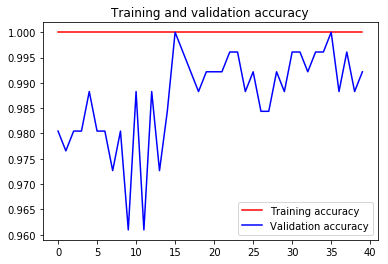

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

MessageError: ignored

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: ignored

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)